In [2]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загружаем датасет 

In [4]:
digits = load_digits()

## Подготавливаем матрицы признаков и ответов

In [5]:
X = digits.data
y = digits.target

In [7]:
print X
print y

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


## Функция для записи ответа

In [6]:
def write_answer(ans, file_name):
    with open(file_name, "w") as fout:
        fout.write(str (ans))

## Задание 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [54]:
tree = DecisionTreeClassifier()

In [8]:
scoreCV = cross_val_score(tree, X, y, cv = 10)

In [9]:
print "score для решающего дерева:"
print scoreCV.mean() # Ответ на 1 вопрос

write_answer(scoreCV.mean(), "task_1")

score для решающего дерева:
0.8325246252339266


## Задание 2
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2.

In [55]:
bagging_tree = ensemble.BaggingClassifier(tree, n_estimators = 100)

In [56]:
scoreBagging = cross_val_score(bagging_tree, X, y, cv = 10)

In [57]:
print "score для бэггинга:"
print scoreBagging.mean() # Ответ на 2 вопрос

write_answer(scoreBagging.mean(), "task_2")

score для бэггинга:
0.9265917001566013


## Задание 3
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на d^(1/2)
​	 случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три.

In [13]:
features = (int) (np.sqrt(X.shape[1]))
bagging_tree = ensemble.BaggingClassifier(tree, n_estimators = 100, max_features = features)

In [14]:
scoreBagging = cross_val_score(bagging_tree, X, y, cv = 10)

In [15]:
print "score для бэггинга с случайными признаками (которые выбираются для дерева):"
print scoreBagging.mean() # Ответ на 3 вопрос

write_answer(scoreBagging.mean(), "task_3")

score для бэггинга с случайными признаками (которые выбираются для дерева):
0.935992567862416


## Задание 4
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d^(1/2)
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [16]:
random_tree = DecisionTreeClassifier(max_features = features)

In [17]:
random_bagging_tree = ensemble.BaggingClassifier(random_tree, n_estimators = 100)

In [18]:
random_scoreBagging = cross_val_score(random_bagging_tree, X, y, cv = 10)

In [19]:
print "score для бэггинга с случайными признаками (которые выбираются при построении каждой вершины дерева)"
print random_scoreBagging.mean()

write_answer(random_scoreBagging.mean(), "task_4") # ответ на 4 вопрос

score для бэггинга с случайными признаками (которые выбираются при построении каждой вершины дерева)
0.9543918191207024


## Задание 5

In [20]:
randomTrees = ensemble.RandomForestClassifier(n_estimators = 100, max_features = features)

In [21]:
score_randomTrees = cross_val_score(randomTrees, X, y, cv = 10)

In [22]:
print "score для случайного леса:"
print score_randomTrees.mean()

score для случайного леса:
0.9527953447889457


### Построим кривую зависимости результата от размера обучающей выборки 

In [23]:
from sklearn.model_selection import learning_curve

In [24]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 1)

In [25]:
train_size, train_scores, test_scores = learning_curve(rf_classifier, X, y, train_sizes = np.arange(0.1, 1., 0.2),
                                                       cv = 3, scoring = 'accuracy')

In [26]:
print train_size
print train_scores.mean(axis = 1)
print test_scores.mean(axis = 1)

[ 119  358  597  836 1075]
[0.98879552 0.97020484 0.94360692 0.93221691 0.9103876 ]
[0.73342081 0.80685861 0.8435978  0.83798829 0.84803588]


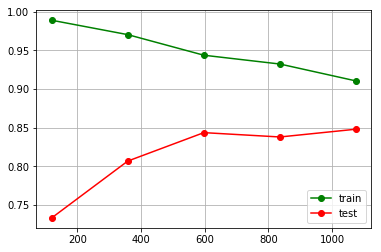

In [27]:
pylab.grid(True)
pylab.plot(train_size, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
pylab.plot(train_size, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
pylab.legend(loc = 'lower right')

### Качество от количества деревьев

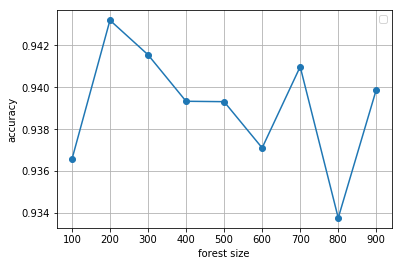

In [50]:
estimators = np.arange(100, 1000, 100) # массив кол-ва деревьев
scores = []

pylab.grid(True)
for estimator in estimators:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = estimator, max_depth = 3, random_state = 1)
    score = cross_val_score(randomTrees, X, y, cv = 3, n_jobs = -1)
    scores.append(score.mean())
pylab.plot(estimators, scores, marker = 'o')
pylab.xlabel('forest size')
pylab.ylabel('accuracy')
pylab.legend()

In [51]:
print 'лучший результат:'
print max(scores)

лучший результат:
0.9432069700327395


### Качество от количества признаков при построении вершин деревьев

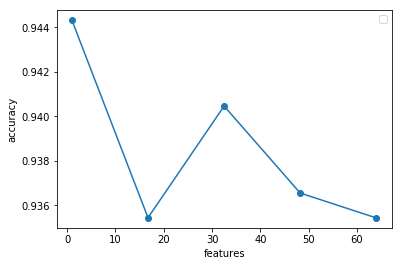

In [37]:
features = np.linspace(1, X.shape[1], 5)
scores = []

for feature in features:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3,
                                                    max_features = feature, random_state = 1)
    score = cross_val_score(randomTrees, X, y, cv = 3, n_jobs = -1)
    scores.append(score.mean())
pylab.plot(features, scores, marker = 'o')
pylab.xlabel('features')
pylab.ylabel('accuracy')
pylab.legend()

In [38]:
print 'лучший результат:'
print max(scores)

лучший результат:
0.9443200756764307


### Качество от глубины деревьев

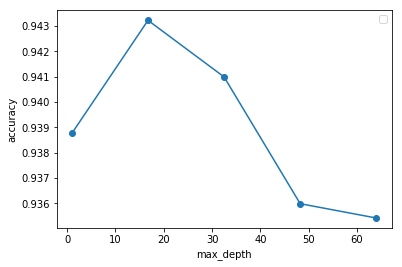

In [39]:
max_depth = np.linspace(2, 30, 5)
scores = []

for depth in max_depth:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = depth, random_state = 1)
    score = cross_val_score(randomTrees, X, y, cv = 3, n_jobs = -1)
    scores.append(score.mean())
pylab.plot(features, scores, marker = 'o')

pylab.xlabel('max_depth')
pylab.ylabel('accuracy')
pylab.legend()  

In [40]:
print 'лучший результат:'
print max(scores)

лучший результат:
0.9432292391560909


### Теперь найдем при помощи GridSearchCV лучшие параметры

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'n_estimators' : [500, 700],
              'max_depth' : [5, 15],
              'max_features' : [1, 30]}

In [43]:
rf_classifier = ensemble.RandomForestClassifier()
optimizer = GridSearchCV(rf_classifier, param_grid, cv = 3, n_jobs = -1)
optimizer.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 700], 'max_features': [1, 30], 'max_depth': [5, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print optimizer.best_params_
print optimizer.best_score_

{'max_features': 1, 'n_estimators': 500, 'max_depth': 15}
0.9488035614913745


## Ответ на 5 задание

In [58]:
with open("task_5", "w") as fout:
        fout.write(" ".join(['2', '3', '4', '7']))